In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from numpy import *
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DAV_Technical_Team/Assignment/Copy of NDAP_REPORT_6000.csv')
df.head()

,ROWID,Country,State lgd code,State,District lgd code,District,Sub-District lgd Code,Sub-District,ULB_RLB_Village lgd Code,ULB_RLB_Village,...,Number of female marginal workers in household industry who worked for 0 to 3 months,Number of marginal workers as Other workers who worked for 0 to 3 months,Number of male marginal workers as Other workers who worked for 0 to 3 months,Number of female marginal workers as Other workers who worked for 0 to 3 months,Number of Non workers,Number of male Non workers,Number of female Non workers,Source Year,YearCode,Year
0,585,India,24,GUJARAT,442,BHARUCH,999999,Unknown SubDistricts of India,9802612,Valia (Naldhari) (INA),...,0,0,0,0,0,0,0,2011,2011,"Calendar Year (Jan - Dec), 2011"
1,637,India,24,GUJARAT,459,SURAT,3937,Majura,802631,Surat,...,0,0,0,0,0,0,0,2011,2011,"Calendar Year (Jan - Dec), 2011"
2,1498,India,21,ODISHA,350,CUTTACK,2954,Choudwar,399316,Industrial Area (OG),...,0,0,0,0,1,1,0,2011,2011,"Calendar Year (Jan - Dec), 2011"
3,2062,India,5,UTTARAKHAND,54,RUDRA PRAYAG,290,Ukhimath,800296,Kedarnath,...,0,0,0,0,8,8,0,2011,2011,"Calendar Year (Jan - Dec), 2011"
4,4150,India,1,JAMMU AND KASHMIR,3,BARAMULLA,39,Tangmarg,800009,Municipal Committee Gulmarg Tangmarg,...,0,0,0,0,3,1,2,2011,2011,"Calendar Year (Jan - Dec), 2011"


In [ ]:
df.shape

(606678, 99)

In [ ]:
df.columns

Index(['ROWID', 'Country', 'State lgd code', 'State', 'District lgd code',
       'District', 'Sub-District lgd Code', 'Sub-District',
       'ULB_RLB_Village lgd Code', 'ULB_RLB_Village', 'Rural or Urban',
       'Households', 'Population', 'Male population', 'Female population',
       'Population in the age group 0 to 6 years',
       'Male Population in the age group 0 to 6 years',
       'Female Population in the age group 0 to 6 years',
       'Scheduled Caste population', 'Male Scheduled Caste population',
       'Female Scheduled Caste population ', 'Scheduled Tribe population',
       'Male Scheduled Tribe population', 'Female Scheduled Tribe population ',
       'Literate population ', 'Male literate population',
       'Female literate population ', 'Illiterate population',
       'Male illiterate population ', 'Female illiterate population ',
       'Working population', 'Male working population',
       'Female Woking population', 'Number of main workers',
       'Number o

In [ ]:
def pearson_correlation(x, y):
    # Calculate mean of x and y
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Calculate covariance and standard deviation of x and y
    cov = np.sum((x - mean_x) * (y - mean_y))
    std_x = np.sqrt(np.sum((x - mean_x)**2))
    std_y = np.sqrt(np.sum((y - mean_y)**2))

    # Calculate Pearson correlation coefficient
    correlation = cov / (std_x * std_y)

    return correlation


#Delete duplicates

In [ ]:
df.drop(columns=["ROWID"]).duplicated().value_counts()

False    606678
dtype: int64

no duplicates

# check if any data data is unfilled

In [ ]:
unfilled_val_exist = df.isnull().any().any()
if unfilled_val_exist:
    print("Unfilled values exist")
else:
    print("No unfilled values")

No unfilled values


# Q1

In [ ]:
df[['State','Population']]

,State,Population
0,GUJARAT,5
1,GUJARAT,18
2,ODISHA,3
3,UTTARAKHAND,612
4,JAMMU AND KASHMIR,1965
...,...,...
606673,TELANGANA,5344
606674,TELANGANA,651
606675,TELANGANA,107
606676,LADAKH,266


In [ ]:
# all the states
states = df['State'].value_counts().index
states.shape

(36,)

In [ ]:
state_pop = {}
for state in states:
    state_df = df[df['State']==state]
    state_pop[state] = state_df['Population'].sum()


##1) total population in each state

In [ ]:
state_pop

{'UTTAR PRADESH': 199812341,
 'MADHYA PRADESH': 72641665,
 'ODISHA': 41980846,
 'RAJASTHAN': 68548437,
 'MAHARASHTRA': 112374333,
 'BIHAR': 104099452,
 'WEST BENGAL': 91276115,
 'JHARKHAND': 32988134,
 'KARNATAKA': 61095297,
 'ASSAM': 31205576,
 'CHHATTISGARH': 25545198,
 'GUJARAT': 60443083,
 'HIMACHAL PRADESH': 6864602,
 'ANDHRA PRADESH': 49577103,
 'TAMIL NADU': 72147030,
 'UTTARAKHAND': 10086292,
 'PUNJAB': 27743338,
 'TELANGANA': 35003674,
 'HARYANA': 25351462,
 'MEGHALAYA': 2966889,
 'JAMMU AND KASHMIR': 12267013,
 'ARUNACHAL PRADESH': 1383727,
 'MANIPUR': 2855794,
 'KERALA': 33406061,
 'NAGALAND': 1978502,
 'TRIPURA': 3673917,
 'MIZORAM': 1097206,
 'SIKKIM': 610577,
 'ANDAMAN AND NICOBAR ISLANDS': 380581,
 'GOA': 1458545,
 'DELHI': 16787941,
 'LADAKH': 274289,
 'PUDUCHERRY': 1247953,
 'THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU': 586956,
 'CHANDIGARH': 1055450,
 'LAKSHADWEEP': 64473}

In [ ]:
dict(sorted(state_pop.items(), key = lambda x:x[1], reverse = True))

{'UTTAR PRADESH': 199812341,
 'MAHARASHTRA': 112374333,
 'BIHAR': 104099452,
 'WEST BENGAL': 91276115,
 'MADHYA PRADESH': 72641665,
 'TAMIL NADU': 72147030,
 'RAJASTHAN': 68548437,
 'KARNATAKA': 61095297,
 'GUJARAT': 60443083,
 'ANDHRA PRADESH': 49577103,
 'ODISHA': 41980846,
 'TELANGANA': 35003674,
 'KERALA': 33406061,
 'JHARKHAND': 32988134,
 'ASSAM': 31205576,
 'PUNJAB': 27743338,
 'CHHATTISGARH': 25545198,
 'HARYANA': 25351462,
 'DELHI': 16787941,
 'JAMMU AND KASHMIR': 12267013,
 'UTTARAKHAND': 10086292,
 'HIMACHAL PRADESH': 6864602,
 'TRIPURA': 3673917,
 'MEGHALAYA': 2966889,
 'MANIPUR': 2855794,
 'NAGALAND': 1978502,
 'GOA': 1458545,
 'ARUNACHAL PRADESH': 1383727,
 'PUDUCHERRY': 1247953,
 'MIZORAM': 1097206,
 'CHANDIGARH': 1055450,
 'SIKKIM': 610577,
 'THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU': 586956,
 'ANDAMAN AND NICOBAR ISLANDS': 380581,
 'LADAKH': 274289,
 'LAKSHADWEEP': 64473}

##2) Which state has the highest male-female ratio?


In [ ]:
state_male_pop = {}
state_female_pop = {}
state_mf_pop = {}
for state in states:
    state_df = df[df['State']==state]
    state_male_pop[state] = state_df['Male population'].sum()
    state_female_pop[state] = state_df['Female population'].sum()
    state_mf_pop[state] = state_male_pop[state]/ state_female_pop[state]

state_mf_pop

{'UTTAR PRADESH': 1.0959666766496912,
 'MADHYA PRADESH': 1.0742007464495902,
 'ODISHA': 1.0216923506636102,
 'RAJASTHAN': 1.0773865184693117,
 'MAHARASHTRA': 1.075959394048657,
 'BIHAR': 1.0894569681498645,
 'WEST BENGAL': 1.0526667948213744,
 'JHARKHAND': 1.054334651548881,
 'KARNATAKA': 1.02781463086286,
 'ASSAM': 1.0441048168517857,
 'CHHATTISGARH': 1.009486243365974,
 'GUJARAT': 1.087836039310386,
 'HIMACHAL PRADESH': 1.0293088804926436,
 'ANDHRA PRADESH': 1.00339129552799,
 'TAMIL NADU': 1.0035802105886977,
 'UTTARAKHAND': 1.0382445737805595,
 'PUNJAB': 1.1171861174173467,
 'TELANGANA': 1.012626005193985,
 'HARYANA': 1.1381499179200198,
 'MEGHALAYA': 1.0113724418785173,
 'JAMMU AND KASHMIR': 1.1211803620441398,
 'ARUNACHAL PRADESH': 1.0658345961198241,
 'MANIPUR': 1.0150845888535769,
 'KERALA': 0.9222472932159456,
 'NAGALAND': 1.0742210801874084,
 'TRIPURA': 1.0415856043291039,
 'MIZORAM': 1.0248621894302476,
 'SIKKIM': 1.123694379615105,
 'ANDAMAN AND NICOBAR ISLANDS': 1.14158460

In [ ]:
for key,val in zip(state_mf_pop.keys(), state_mf_pop.values()):
    if val == max(state_mf_pop.values()):
        print(f'state with highest male-female ratio ({val}) is {key} ')

state with highest male-female ratio (1.41650095720373) is THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU 


##3) Which state has the higher proportin of SC/ST population? Does the states with higher proportion of SC/ST population has lower literacy rate?


In [ ]:
state_literacy = {}
state_sc_pop ={}
state_st_pop = {}
state_sc_st_pop = {}
for state in states:
    state_df = df[df['State'] == state]
    state_literacy[state] = (state_df['Literate population '].sum() - state_df['Population in the age group 0 to 6 years'].sum()) / state_pop[state]
    state_sc_pop[state] = state_df["Scheduled Caste population"].sum() / state_pop[state]
    state_st_pop[state] = state_df["Scheduled Tribe population"].sum() / state_pop[state]
    state_sc_st_pop[state] = (state_df["Scheduled Caste population"].sum() + state_df["Scheduled Tribe population"].sum()) /state_pop[state]


In [ ]:
pearson_correlation(list(state_literacy.values()), list(state_sc_st_pop.values()))

-0.07837084270905519

In [ ]:
state_sc_pop_sorted = dict(sorted(state_sc_pop.items(), key = lambda x:x[1], reverse = True))
print(f"top 5 states with highest proportion of SC population are")
list(state_sc_pop_sorted.items())[:5]

top 5 states with highest proportion of SC population are


[('PUNJAB', 0.3193623997227731),
 ('HIMACHAL PRADESH', 0.25190855930176287),
 ('WEST BENGAL', 0.23514662077806445),
 ('UTTAR PRADESH', 0.20698225041064905),
 ('HARYANA', 0.201708879748237)]

In [ ]:
state_st_pop_sorted = dict(sorted(state_st_pop.items(), key = lambda x:x[1], reverse = True))
print(f"top 5 states with highest proportion of ST population are")
list(state_st_pop_sorted.items())[:5]

top 5 states with highest proportion of ST population are


[('LAKSHADWEEP', 0.9479937338110527),
 ('MIZORAM', 0.9443213033833209),
 ('NAGALAND', 0.8647820421712993),
 ('MEGHALAYA', 0.8614616185506098),
 ('LADAKH', 0.7954857832432216)]

In [ ]:
state_sc_st_pop_sorted = dict(sorted(state_sc_st_pop.items(), key = lambda x:x[1], reverse = True))
print(f"top 5 states with highest proportion of SC/ST population are")
list(state_sc_st_pop_sorted.items())[:5]

top 5 states with highest proportion of SC/ST population are


[('LAKSHADWEEP', 0.9479937338110527),
 ('MIZORAM', 0.9454313957451927),
 ('MEGHALAYA', 0.867311180162116),
 ('NAGALAND', 0.8647820421712993),
 ('LADAKH', 0.7973305528110861)]

In [ ]:
print("literacy rate of top 5 states with highest proportion of SC/ST population")
i=0
for state in state_sc_st_pop_sorted.keys():
    print(f"literacy rate of {state} is {state_literacy[state]}")
    i+=1
    if i==5:
      break

literacy rate of top 5 states with highest proportion of SC/ST population
literacy rate of LAKSHADWEEP is 0.7025886805329362
literacy rate of MIZORAM is 0.6194315379245101
literacy rate of MEGHALAYA is 0.41001500224646087
literacy rate of NAGALAND is 0.5313934481744269
literacy rate of LADAKH is 0.5398029086109906


In [ ]:
state_literacy_sorted = dict(sorted(state_literacy.items(), key = lambda x : x[1]))
print(f"top 5 state with lowest literacy rate are ")
list(state_literacy_sorted.items())[:5]

top 5 state with lowest literacy rate are 


[('BIHAR', 0.3205645021070812),
 ('JHARKHAND', 0.3922190324557309),
 ('JAMMU AND KASHMIR', 0.3994669280940682),
 ('ARUNACHAL PRADESH', 0.40023574014238356),
 ('RAJASTHAN', 0.4030110562550099)]

Ans:

We cannot conclude that the states with higher proportion of
SC/ST population has lower literacy rate. There are other reasons
for the lower literacy rates. 'LAKSHADWEEP' has the highest
SC/ST population, but the literacy rate of 'LAKSHADWEEP' is
0.7025886805329362 which is among the top literate states.Pearson correlation is -0.07837084270905519.

##4) What is the proportion of male and female working population in each occupation?

In [ ]:
print("proprotion of male working population = ",df["Male working population"].sum() / df["Working population"].sum())
print("proprotion of female working population = ",df['Female Woking population'].sum() / df["Working population"].sum())

proprotion of male working population =  0.6888327589514223
proprotion of female working population =  0.3111672410485777


### Cultivators

In [ ]:
male_cultivators = df['Number of male main workers as cultivators'].sum() + df['Number of male marginal workers as cultivators'].sum()

In [ ]:
female_cultivators = df['Number of female main workers as cultivators'].sum() + df['Number of female marginal workers as cultivators'].sum()

In [ ]:
print("proportion of male wrokers as cultivators =", male_cultivators/ (male_cultivators + female_cultivators))
print("proportion of female wrokers as cultivators =", female_cultivators/ (male_cultivators + female_cultivators))

proportion of male wrokers as cultivators = 0.6966072228096949
proportion of female wrokers as cultivators = 0.3033927771903051


### Agriculture Labours

In [ ]:
male_agri_labours = df['Number of male main workers as agricultural labourers'].sum() + df['Number of male marginal workers as agricultural labourers'].sum()
female_agri_labours = df['Number of female main workers as agricultural labourers'].sum() + df['Number of female marginal workers as agricultural labourers'].sum()

In [ ]:
print("proportion of male wrokers as agricultural labourers =", male_agri_labours/ (male_agri_labours + female_agri_labours))
print("proportion of female wrokers as agricultural labourers =",female_agri_labours/ (male_agri_labours + female_agri_labours))

proportion of male wrokers as agricultural labourers = 0.5732719746737632
proportion of female wrokers as agricultural labourers = 0.42672802532623677


### House hold industry

In [ ]:
male_house_hold = df['Number of male main workers in the household industry'].sum() + df['Number of male marginal workers in the household industry'].sum()
female_house_hold = df['Number of female main workers in the household industry'].sum() + df['Number of female marginal workers in the household industry'].sum()

In [ ]:
print("proportion of male wrokers in the household industry =", male_house_hold/ (male_house_hold + female_house_hold))
print("proportion of female wrokers in the household industry =",female_house_hold/ (male_house_hold + female_house_hold))

proportion of male wrokers in the household industry = 0.5331233400868165
proportion of female wrokers in the household industry = 0.4668766599131835


### other workers

In [ ]:
male_other = df['Number of male main workers as Other workers'].sum() + df['Number of male marginal workers as Other workers'].sum()
female_other = df['Number of female main workers as Other workers'].sum() + df['Number of female marginal workers as Other workers'].sum()

In [ ]:
print("proportion of male wrokers in other industry =", male_other/ (male_other + female_other))
print("proportion of female wrokers in other industry =",female_other/ (male_other + female_other))

proportion of male wrokers in other industry = 0.7816963953323609
proportion of female wrokers in other industry = 0.21830360466763907


summary:

proprotion of male working population = 0.6888327589514223
proprotion of female working population = 0.3111672410485777

proportion of male wrokers as cultivators = 0.6966072228096949
proportion of female wrokers as cultivators =
0.3033927771903051

proportion of male wrokers as agricultural labourers =
0.5732719746737632
proportion of female wrokers as agricultural labourers =
0.42672802532623677

proportion of male wrokers in the household industry =
0.5331233400868165
proportion of female wrokers in the household industry =
0.4668766599131835

proportion of male wrokers in other industry =
0.7816963953323609
proportion of female wrokers in other industry =
0.21830360466763907

Here, we can see that female participation as cultivators and in
other industries is very less compared to male participation.
Female are more inclined to house hold industry and as
agricultural labourers.

#5) Which state has more number of workers in agriculture field?


In [ ]:
state_agri = {}
state_agri_proportion ={}

for state in states:
    state_df = df[df["State"]==state]
    state_agri[state] = state_df["Number of main workers as cultivators"].sum() + state_df["Number of marginal workers as cultivators"].sum() + state_df["Number of main workers as agricultural labourers"].sum() + state_df["Number of marginal workers as agricultural labourers"].sum()
    state_agri_proportion[state] = state_agri[state]/ state_df['Working population'].sum()

In [ ]:
state_agri_sorted = dict(sorted(state_agri.items(), key = lambda x:x[1], reverse= True))
state_agri_proportion_sorted = dict(sorted(state_agri_proportion.items(), key = lambda x:x[1], reverse= True))

In [ ]:
print("top 5 states with highest number of workers in agricultural field")
list(state_agri_sorted.items())[:5]

top 5 states with highest number of workers in agricultural field


[('UTTAR PRADESH', 38997111),
 ('MAHARASHTRA', 26055513),
 ('BIHAR', 25541875),
 ('MADHYA PRADESH', 22036813),
 ('RAJASTHAN', 18558534)]

In [ ]:
print("top 5 states with highest proportion of workers in agricultural field")
list(state_agri_proportion_sorted.items())[:5]

top 5 states with highest proportion of workers in agricultural field


[('CHHATTISGARH', 0.7468398982777412),
 ('BIHAR', 0.7355474315944308),
 ('MADHYA PRADESH', 0.6978277350577956),
 ('JHARKHAND', 0.6299214690424098),
 ('HIMACHAL PRADESH', 0.6285009195313171)]

Around 75 % of workers in 'CHHATTISGARH' and 'BIHAR' are
working in agricultural field. More than 60 % of working class of
'MADHYA PRADESH', 'JHARKHAND' and 'HIMACHAL
PRADESH' are in the agricultural field. These states mainly rely
on agriculture.

#6) Urban/ Rural, which region has the largest proportion of house hold workers?


In [ ]:
rural_urban = ['Rural','Urban']



for area in rural_urban:
    area_df = df[df["Rural or Urban"] == area]

    if area == 'Rural':
        rural_house_hold = area_df['Number of main workers in the household industry'].sum() + area_df['Number of marginal workers in the household industry'].sum()
        rural_house_hold_proportion = rural_house_hold / area_df["Working population"].sum()

    if area == 'Urban':
        urban_house_hold = area_df['Number of main workers in the household industry'].sum() + area_df['Number of marginal workers in the household industry'].sum()
        urban_house_hold_proprotion = urban_house_hold/ area_df["Working population"].sum()


In [ ]:
print(f"Rural \n Number of people in house hold industry = {rural_house_hold} \n Proportion of number of people in house hold industry = {rural_house_hold_proportion}")
print(f"Urban \n Number of people in house hold industry = {urban_house_hold} \n Proportion of number of people in house hold industry = {urban_house_hold_proprotion}")

Rural 
 Number of people in house hold industry = 11949480 
 Proportion of number of people in house hold industry = 0.03426442064119796
Urban 
 Number of people in house hold industry = 6389205 
 Proportion of number of people in house hold industry = 0.04798334910296922


Ans:

Rural :

Number of people in house hold industry = 11949480
Proportion of number of people in house hold industry =
0.03426442064119796
Urban :

Number of people in house hold industry = 6389205
Proportion of number of people in house hold industry =
0.04798334910296922

More number of people are in house hold industry in rural areas
compared to urban areas, but urban areas has more proportion of
people in house hold industry than that of rural area.

##7)Is there a relationship between the number of marginal workers and the population in the age group 0 to 6 years? What is the proportion of female to male marginal workers?

In [ ]:
state_marginal_workers = {}
state_pop_0_6 ={}
for state in states:
    state_df = df[df['State'] == state]

    state_marginal_workers[state] = state_df['Number of marginal workers'].sum()

    state_pop_0_6[state] = state_df['Population in the age group 0 to 6 years'].sum()


In [ ]:
state_pop_0_6_sorted = dict(sorted(state_pop_0_6.items(), key =lambda x:x[1], reverse = True))
state_marginal_workers_sorted = dict(sorted(state_marginal_workers.items(), key =lambda x:x[1], reverse = True))



In [ ]:
state_marginal_workers_sorted.keys()

dict_keys(['UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'MADHYA PRADESH', 'RAJASTHAN', 'ODISHA', 'JHARKHAND', 'MAHARASHTRA', 'TAMIL NADU', 'KARNATAKA', 'GUJARAT', 'CHHATTISGARH', 'ANDHRA PRADESH', 'ASSAM', 'TELANGANA', 'KERALA', 'HARYANA', 'JAMMU AND KASHMIR', 'HIMACHAL PRADESH', 'PUNJAB', 'UTTARAKHAND', 'TRIPURA', 'MANIPUR', 'DELHI', 'MEGHALAYA', 'NAGALAND', 'ARUNACHAL PRADESH', 'GOA', 'SIKKIM', 'MIZORAM', 'PUDUCHERRY', 'LADAKH', 'THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU', 'ANDAMAN AND NICOBAR ISLANDS', 'CHANDIGARH', 'LAKSHADWEEP'])

In [ ]:
state_pop_0_6_sorted.keys()

dict_keys(['UTTAR PRADESH', 'BIHAR', 'MAHARASHTRA', 'MADHYA PRADESH', 'RAJASTHAN', 'WEST BENGAL', 'GUJARAT', 'TAMIL NADU', 'KARNATAKA', 'JHARKHAND', 'ODISHA', 'ANDHRA PRADESH', 'ASSAM', 'TELANGANA', 'CHHATTISGARH', 'KERALA', 'HARYANA', 'PUNJAB', 'DELHI', 'JAMMU AND KASHMIR', 'UTTARAKHAND', 'HIMACHAL PRADESH', 'MEGHALAYA', 'TRIPURA', 'MANIPUR', 'NAGALAND', 'ARUNACHAL PRADESH', 'MIZORAM', 'GOA', 'PUDUCHERRY', 'CHANDIGARH', 'THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU', 'SIKKIM', 'ANDAMAN AND NICOBAR ISLANDS', 'LADAKH', 'LAKSHADWEEP'])

In [ ]:
pearson_correlation(df["Number of marginal workers"], df["Population in the age group 0 to 6 years"])

0.894432078970758

In [ ]:
len(states)

36

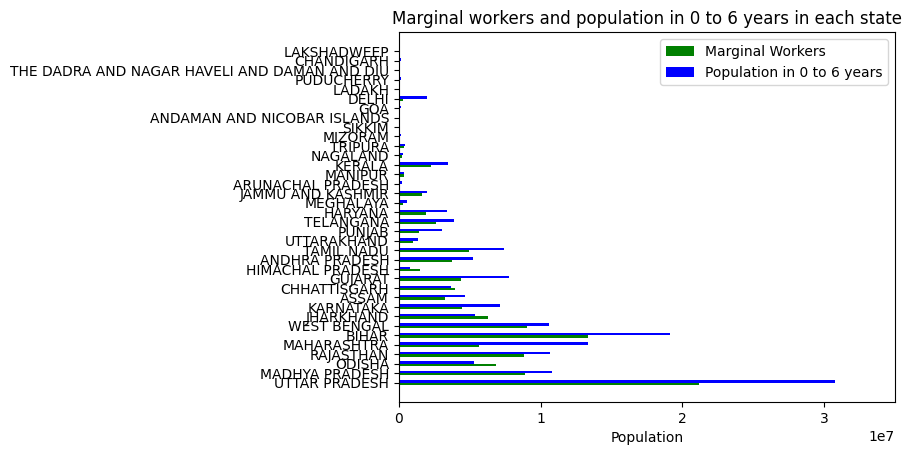

In [ ]:

ind = arange(36)
width = 0.25

fig, ax = plt.subplots()
plt.xlim(0,3.5*1e7)
rects1 = ax.barh(ind, list(state_marginal_workers.values()), width,color='g',align='center')
rects2 = ax.barh(ind+width, list(state_pop_0_6.values()),width,color='b',align='center')
ax.set_xlabel('Population')
ax.set_title('Marginal workers and population in 0 to 6 years in each state')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels((x for x in states))
ax.legend((rects1[0], rects2[0] ), ('Marginal Workers', 'Population in 0 to 6 years'))
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (20,25)
plt.show()

Pearson correlation between population between 0-6 years
and number of marginal workers in each state in
0.894432078970758.
Top five states with higher population in 0-6 years are,
'UTTAR PRADESH', 'BIHAR', 'MAHARASHTRA', 'MADHYA
PRADESH', 'RAJASTHAN'.
Top fives states with higher number of marginal wokers are,
'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'MADHYA
PRADESH', 'RAJASTHAN'.
We can conclude that wherever the population in 0-6 years is
higher the number of marginal workers are also higher.

## 8) Among the rural areas, do sub-districts with a higher ratio of non-workers to working population have a lower literacy rate?


In [ ]:
sub_districts = list(df['Sub-District'].value_counts().index)
sub_districts[:5]

['Unknown SubDistricts of India', 'Lalganj', 'Fatehpur', 'Harraiya', 'Basti']

In [ ]:
rural_df = df.loc[df["Rural or Urban"] == "Rural"]

# Calculate the total working population for each sub-district
sub_dist_working_pop = rural_df.groupby("Sub-District")["Working population"].sum()

# Calculate the total non-working population for each sub-district
sub_dist_non_work_pop = rural_df.groupby("Sub-District")["Number of Non workers"].sum()

# Calculate the total population for each sub-district
sub_dist_pop = rural_df.groupby("Sub-District")["Population"].sum() - rural_df.groupby("Sub-District")['Population in the age group 0 to 6 years'].sum()

# Calculate the total literate population for each sub-district
sub_dist_literate_pop = rural_df.groupby("Sub-District")["Literate population "].sum()

# Calculate the non-working to working ratio for each sub-district
sub_dist_non_work_working = sub_dist_non_work_pop / (sub_dist_working_pop + sub_dist_non_work_pop)

# Calculate the literacy rate for each sub-district
sub_dist_literacy = sub_dist_literate_pop / sub_dist_pop

# Convert the series to dictionaries
sub_dist_non_work_working = sub_dist_non_work_working.to_dict()
sub_dist_literacy = sub_dist_literacy.to_dict()


In [ ]:
pearson_correlation(list(sub_dist_non_work_working.values()),list(sub_dist_literacy.values()))

0.16123698961859362

In [ ]:
print("top 5 sub-district where umemployment is highest")
sub_dist_unemployment = list(dict(sorted(sub_dist_non_work_working.items(), key =lambda x:x[1] ,reverse =True)).items())
sub_dist_unemployment[:5]

top 5 sub-district where umemployment is highest


[('Drugmulla', 0.8085394581861013),
 ('Kannur', 0.7996475580809898),
 ('Lalpora', 0.7915970954840212),
 ('Trehgam', 0.7895379605129249),
 ('Laroka', 0.7844311377245509)]

In [ ]:
for sub_dist,_  in sub_dist_unemployment[:5]:
    print(f"literacy of {sub_dist} is {sub_dist_literacy[sub_dist]}")


literacy of Drugmulla is 0.694099263338046
literacy of Kannur is 0.9501434115066644
literacy of Lalpora is 0.5939135390939394
literacy of Trehgam is 0.652916703549615
literacy of Laroka is 0.6804850073734229


In [ ]:
print('sub-district with least literacy rate')
list(dict(sorted(sub_dist_literacy.items(), key =lambda x:x[1]) ).items())[:5]

sub-district with least literacy rate


[('Pumao Circle', 0.14796879203658864),
 ('Konta', 0.2043817831423065),
 ('Kotiya', 0.22022194821208385),
 ('Bastanar', 0.223642979884767),
 ('Katekalyan', 0.23300265474360765)]

Pearson-correlation between unemployment and literacy rate is
0.16123698961859362.
It is evident that literacy rate has less impact on the
unemployment. Also, Kannur which is second in unemployment
ratio has literacy of 0.9501. All other sub-districts with higher
unemployment has literacy rate around 60%.

## 9) What is the distribution of occupation in rural and urban areas?

In [ ]:
cultivators = df.groupby("Rural or Urban")["Number of main workers as cultivators"].sum() + df.groupby("Rural or Urban")["Number of marginal workers as cultivators"].sum()
agriculture_labours = df.groupby("Rural or Urban")["Number of main workers as agricultural labourers"].sum() + df.groupby("Rural or Urban")["Number of marginal workers as agricultural labourers"].sum()
house_hold_ind = df.groupby("Rural or Urban")["Number of main workers in the household industry"].sum() + df.groupby("Rural or Urban")["Number of marginal workers in the household industry"].sum()
other_ind =  df.groupby("Rural or Urban")['Number of  main workers as Other workers'].sum() + df.groupby("Rural or Urban")['Number of marginal workers as Other workers'].sum()


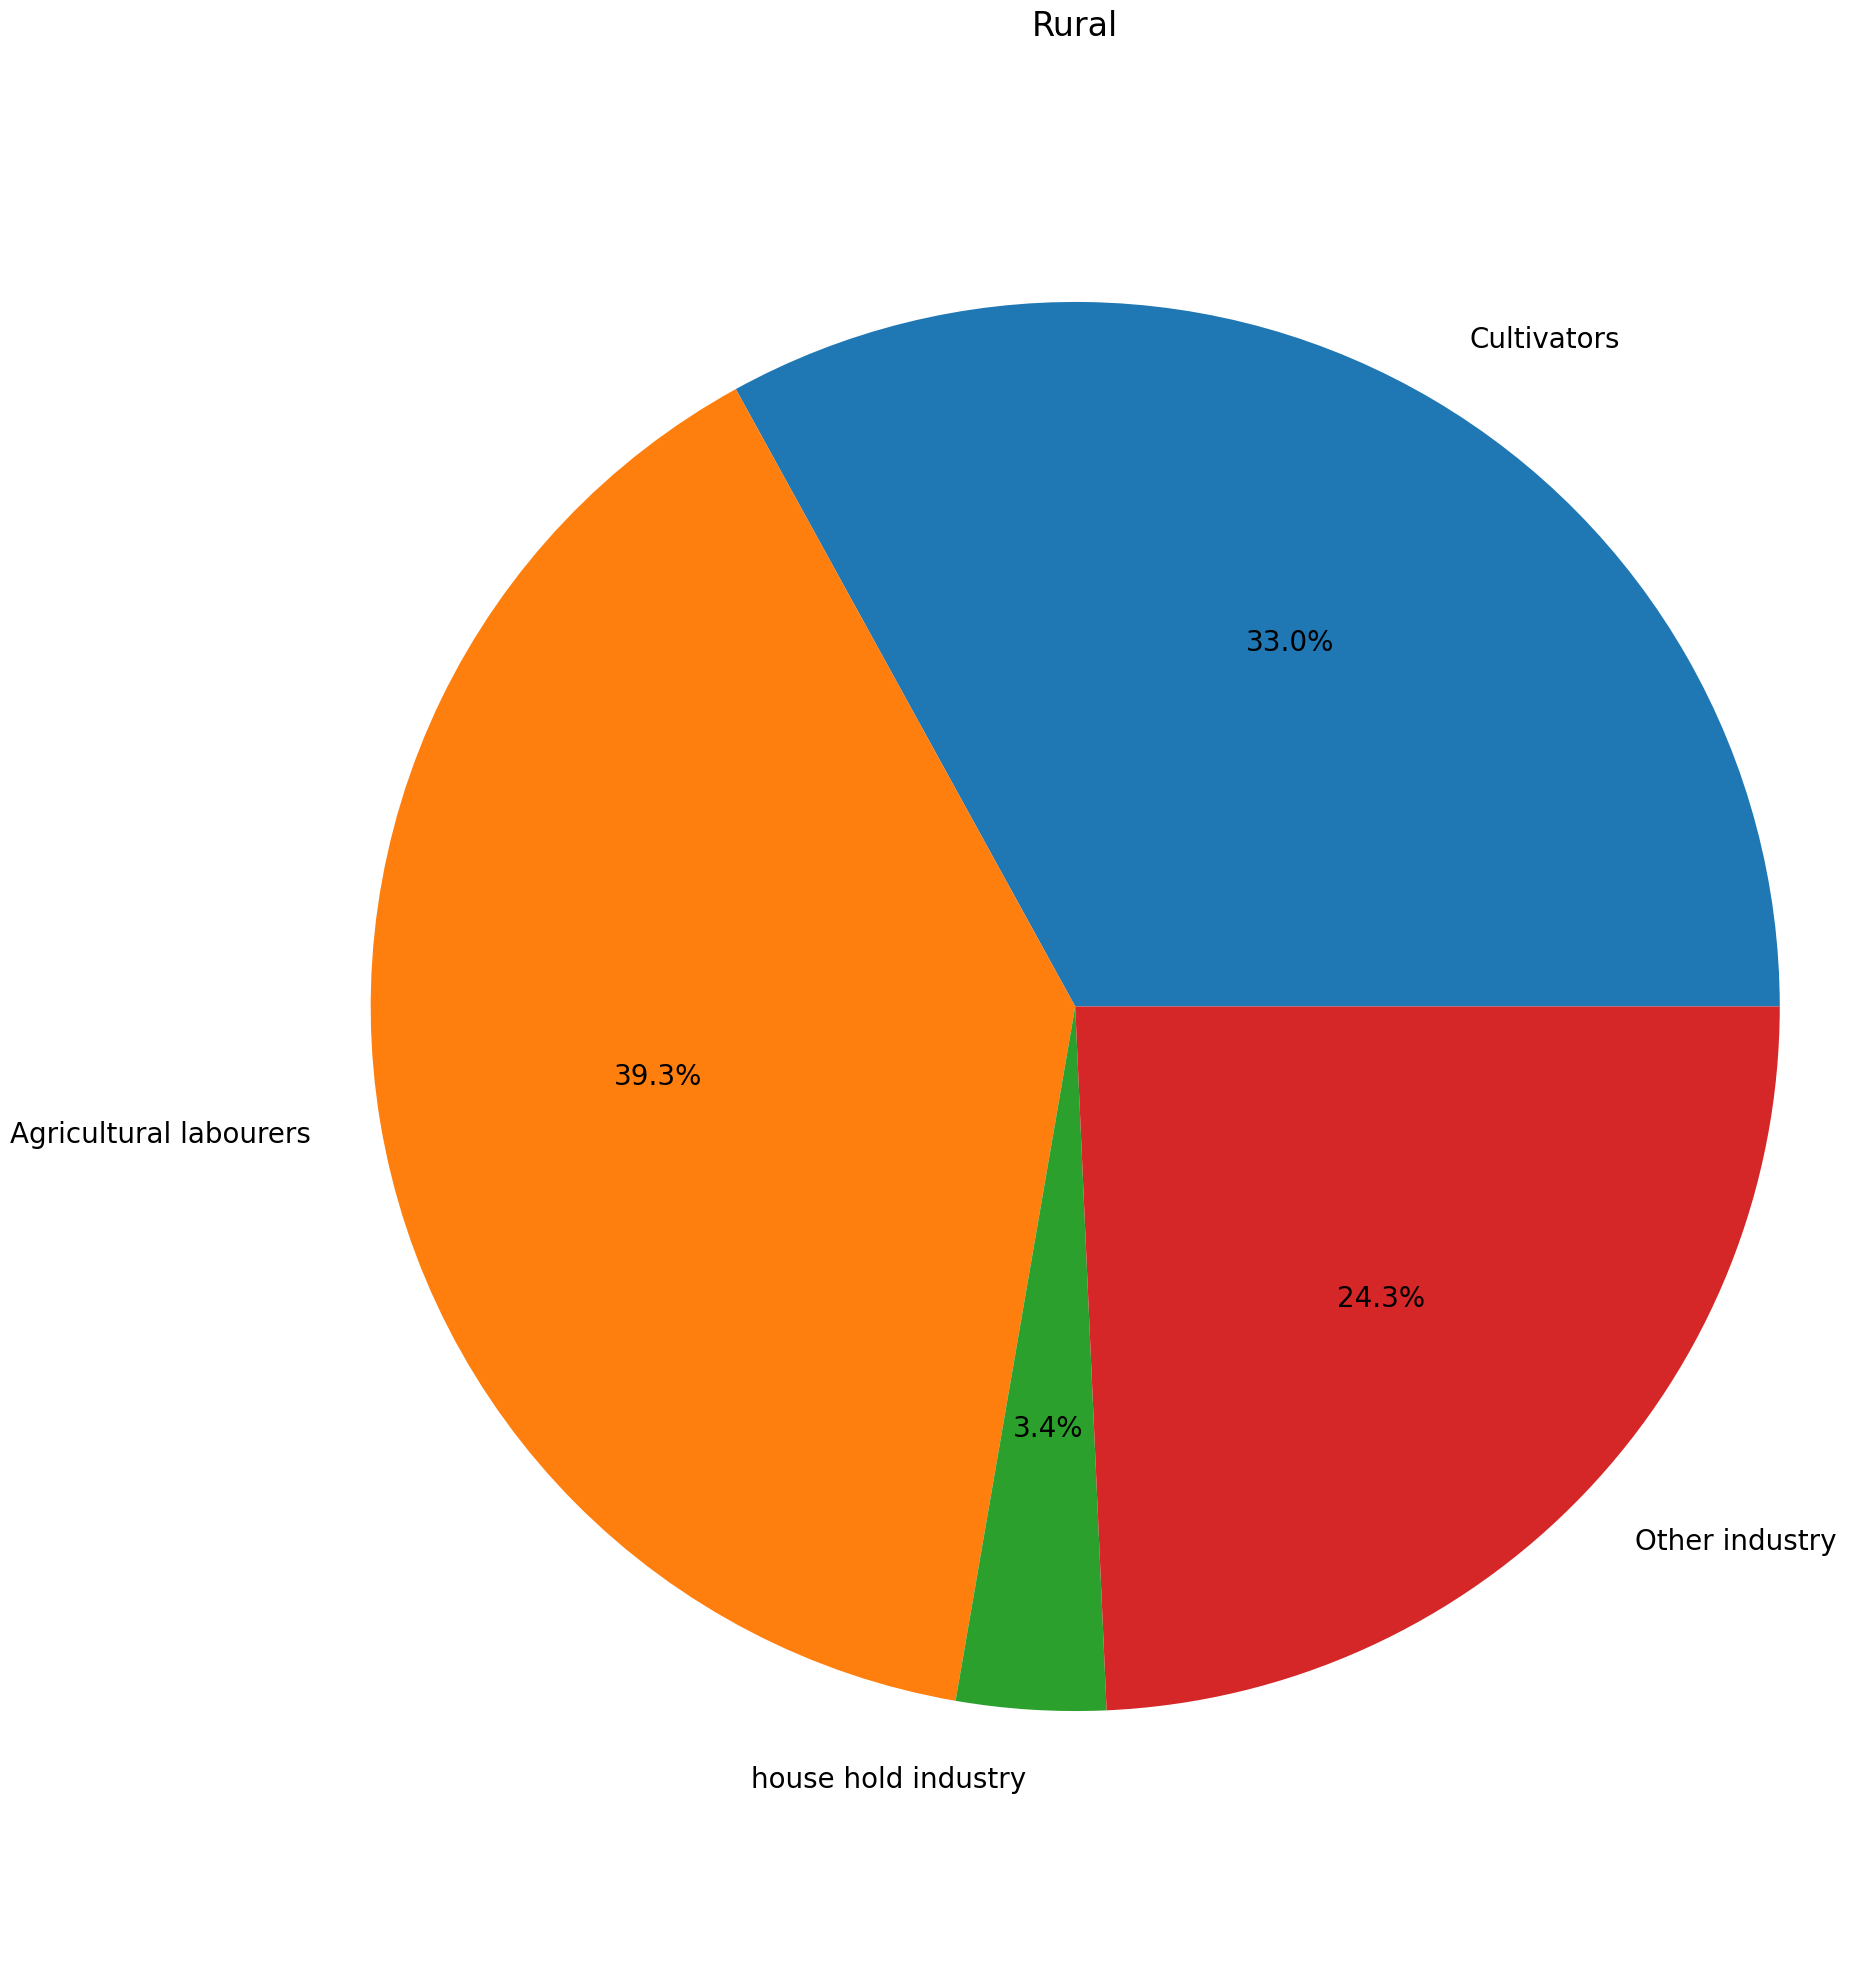

In [ ]:

labels = ['Cultivators', 'Agricultural labourers', 'house hold industry', 'Other industry']
sizes = [cultivators["Rural"],agriculture_labours["Rural"], house_hold_ind["Rural"],other_ind["Rural"]  ]

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Rural")
plt.show()

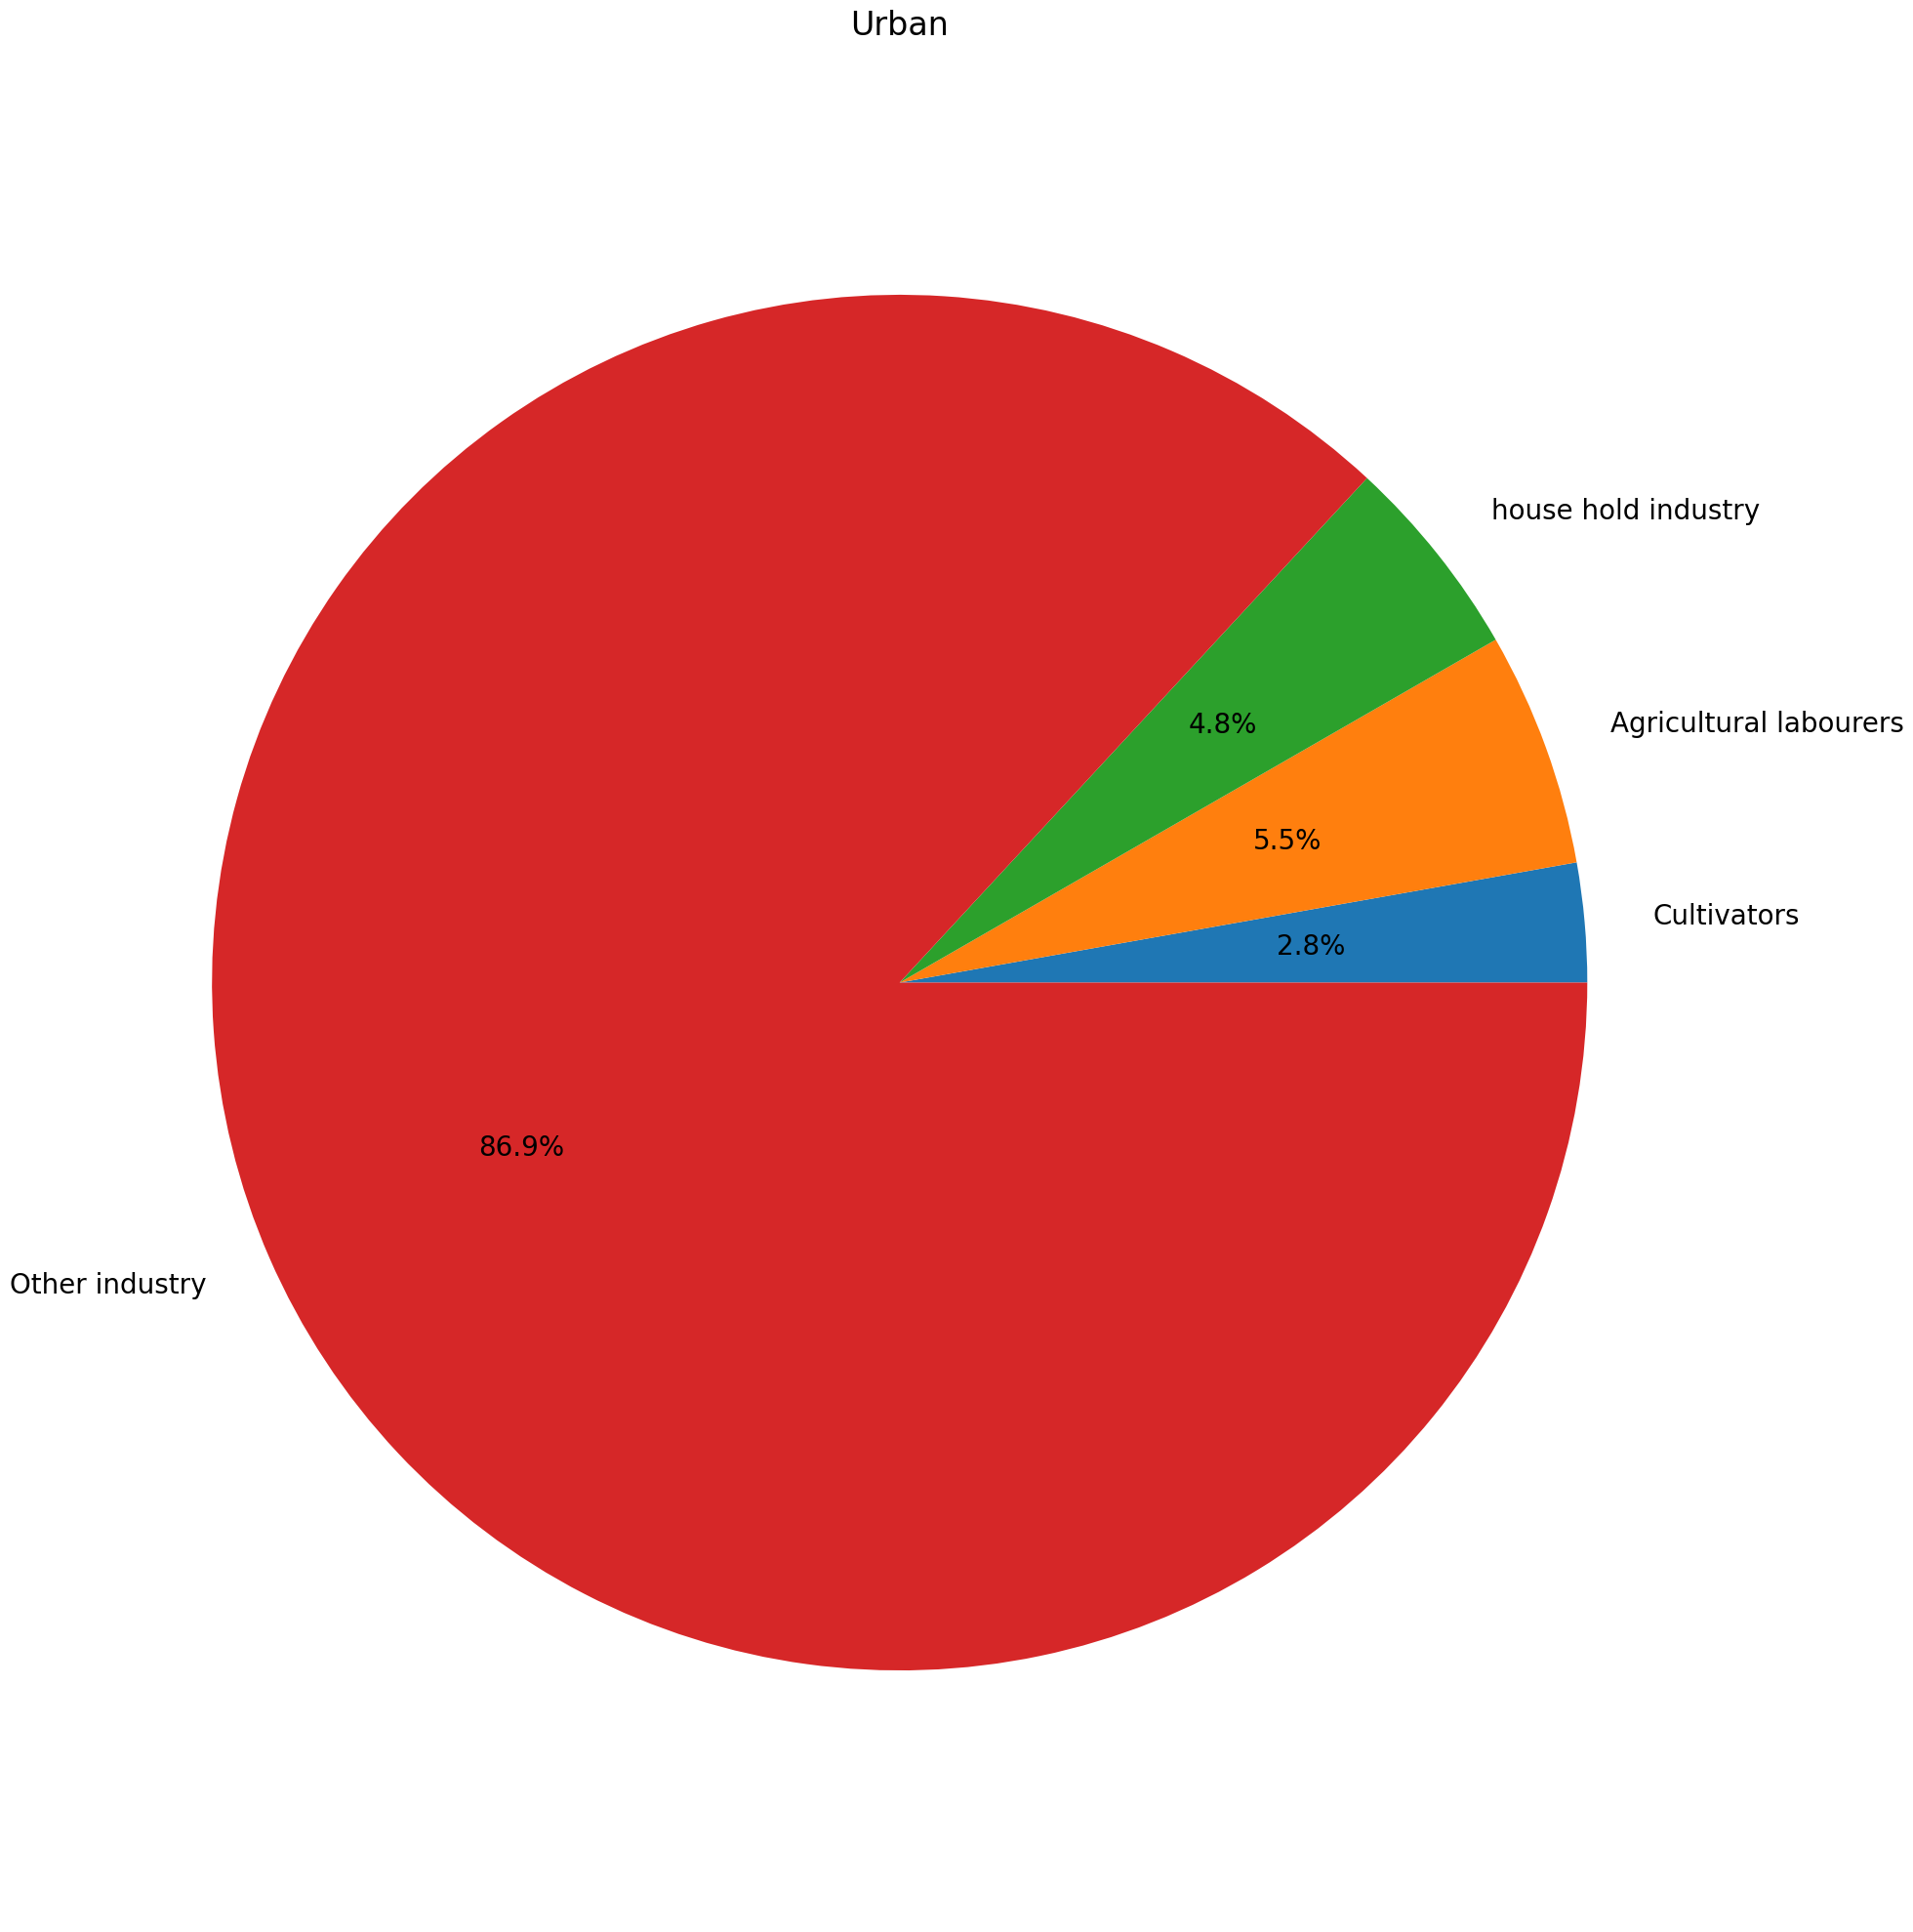

In [ ]:
labels = ['Cultivators', 'Agricultural labourers', 'house hold industry', 'Other industry']
sizes = [cultivators["Urban"],agriculture_labours["Urban"], house_hold_ind["Urban"],other_ind["Urban"]  ]

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Urban")
plt.show()

Ans:

From the above diagrams it is clear that agriculture field
(cultivators and agricultural labourers) is the major occupation in
rural areas. Whereas, in urban areas agriculture field is least
popular and majority of occupation belongs to other industries.
House hold distribution has small proportion in both urban and
rural areas.

## 10) Among the Urban areas, do sub-districts with a higher ratio of non-workers to working population have a lower literacy rate?


In [ ]:
urban_df = df.loc[df["Rural or Urban"] == "Urban"]

# Calculate the total working population for each sub-district
urban_sub_dist_working_pop = urban_df.groupby("Sub-District")["Working population"].sum()

# Calculate the total non-working population for each sub-district
urban_sub_dist_non_work_pop = urban_df.groupby("Sub-District")["Number of Non workers"].sum()

# Calculate the total population for each sub-district
urban_sub_dist_pop = urban_df.groupby("Sub-District")["Population"].sum() - urban_df.groupby("Sub-District")['Population in the age group 0 to 6 years'].sum()

# Calculate the total literate population for each sub-district
urban_sub_dist_literate_pop = urban_df.groupby("Sub-District")["Literate population "].sum()

# Calculate the non-working to working ratio for each sub-district
urban_sub_dist_non_work_working = urban_sub_dist_non_work_pop / (urban_sub_dist_working_pop + urban_sub_dist_non_work_pop)

# Calculate the literacy rate for each sub-district
urban_sub_dist_literacy = urban_sub_dist_literate_pop / urban_sub_dist_pop

# Convert the series to dictionaries
urban_sub_dist_non_work_working = urban_sub_dist_non_work_working.to_dict()
urban_sub_dist_literacy = urban_sub_dist_literacy.to_dict()

In [ ]:
pearson_correlation(list(urban_sub_dist_non_work_working.values()),list(urban_sub_dist_literacy.values()))

-0.09807308416769125

In [ ]:
print("top 5 urban sub-district where umemployment is highest")
urban_sub_dist_unemployment = list(dict(sorted(urban_sub_dist_non_work_working.items(), key =lambda x:x[1] ,reverse =True)).items())
urban_sub_dist_unemployment[:5]

top 5 urban sub-district where umemployment is highest


[('Kralpora', 0.8666768947529917),
 ('Lalpora', 0.8240784499054821),
 ('Andrott', 0.8038602448396033),
 ('Badli', 0.7975553857906799),
 ('Tirtol', 0.7919545353242701)]

In [ ]:
for sub_dist,_  in urban_sub_dist_unemployment[:5]:
      print(f"literacy of {sub_dist} is {urban_sub_dist_literacy[sub_dist]}")

literacy of Kralpora is 0.6644709757101688
literacy of Lalpora is 0.6431591408760359
literacy of Andrott is 0.9060970636215334
literacy of Badli is 0.8748882931188561
literacy of Tirtol is 0.9064628035461905


In [ ]:
print("top 5 urban sub-district where literacy rate is lowest")
list(dict(sorted(urban_sub_dist_literacy.items(), key =lambda x:x[1] )).items())[:5]

top 5 urban sub-district where literacy rate is lowest


[('Hindoli', 0.2236255572065379),
 ('Kanadiya', 0.3270440251572327),
 ('Gandhi Nagar', 0.3816326530612245),
 ('Sahaswan', 0.39614270191959433),
 ('ARJYAPALLI MARINE', 0.40304127443881244)]

Ans:

Pearson correlation between literacy rate and ratio of non working
population to (working+ non working population) is
-0.09807308416769125.
From the above results we cannot conclude that literacy rate will
be least where unemployment ratio is higher.